In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')
gender=pd.read_csv('gender_submission.csv')

In [4]:
test=test.merge(gender,on='PassengerId')

In [5]:
del gender

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


cabin has lots of missing data, and ticket is unique for each person so deleting both 'Ticket' and 'Cabin' column


In [7]:
train.drop(columns=['Ticket','Cabin'],inplace=True)
test.drop(columns=['Ticket','Cabin'],inplace=True)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [9]:
t=train.groupby(['Pclass','Survived']).size().reset_index()

In [10]:
t.rename(columns={0:'no'},inplace=True)

In [11]:
t=t.pivot_table(index='Pclass',columns='Survived',values='no')

In [12]:
t

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Below graph shows that around 500 people died out of 892 people...Exact value shown below

In [13]:
train.groupby('Survived').size()
# 549 people died out of 892

Survived
0    549
1    342
dtype: int64

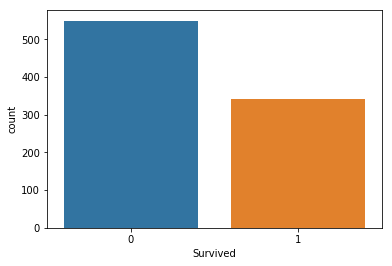

In [14]:
sns.countplot(train['Survived'])

Graphical representation of people's survival based on their class.   This map shows that around 76% of class 3 people couldn't survive  and class 1 people were saved the most

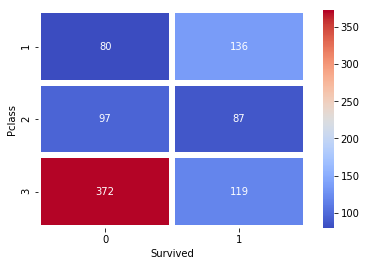

In [15]:
sns.heatmap(t,annot=True,color='white',linewidth=5,cmap='coolwarm',fmt='.0f')

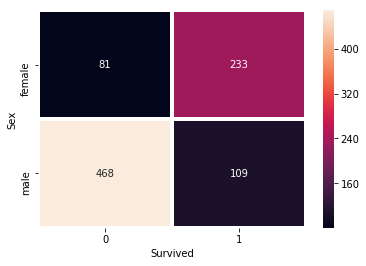

In [16]:
sex_with_survival=train.groupby(['Sex','Survived']).size().reset_index()
sex_with_survival.rename(columns={0:'no'},inplace=True)
sns.heatmap(sex_with_survival.pivot_table(index='Sex',columns='Survived',values='no'),annot=True,linewidth=3,fmt='.0f')

**The above heatmap shows that females were given priority in rescue operation**

Q) Relation between age, and survival on basis of sex

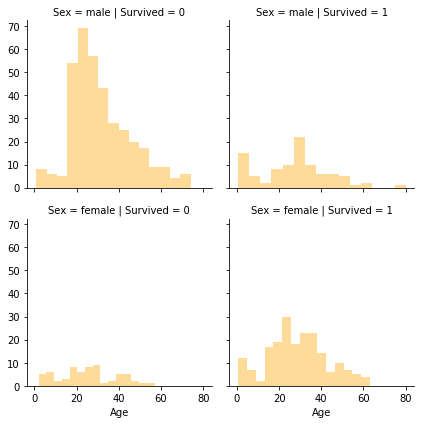

In [40]:
import matplotlib.pyplot as plt
graph=sns.FacetGrid(col='Survived',row='Sex',data=train)
graph=graph.map(sns.distplot,'Age',kde=False,bins=15,hist_kws={'color':'orange'})

we will need to create age groups. to get better results since from the data we have got to know that generally infants from both the sex have survived more and except for infants, men between 15-33 have high probability of survival, and females have a high probability of survival between 14-past 40 before 50

In [41]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


Combining SibSp and Parch into single column 'relatives'

In [45]:
dataset=[train,test]
for data in dataset:
    data['relatives']=data['SibSp']+data['Parch']

706 µs ± 7.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1


In [49]:
# Dropping sib and parch since these two columns make no sense separate
for data in dataset:
    data.drop(columns={'SibSp','Parch'},inplace=True)

In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1


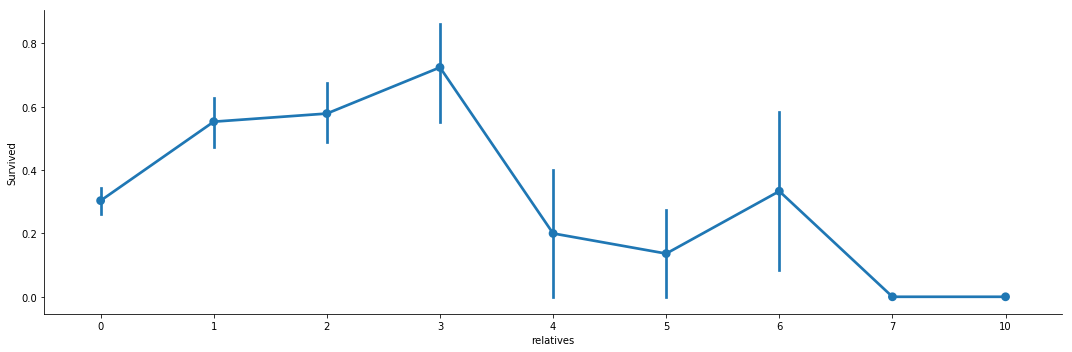

In [55]:
sns.catplot(x='relatives',y='Survived',data=train,kind='point',aspect=3)

The above graph shows that people having relatives between 1 and 3 had higher probability of survival